# Customer Churn Prediction using Basic Regression Models

This project analyzes customer data from a telecom company to predict churn using machine learning. We'll perform data cleaning, preprocessing, modeling, and evaluation using the following models:
- Logistic Regression
- Decision Trees
- KNearestNeighbors
- SMOTE


## Library Imports

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, LabelEncoder, StandardScaler

## Data Loading

In [222]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.xls')

In [223]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [224]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Cleaning

In [225]:
le = LabelEncoder()
ohe = OneHotEncoder()

cate = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling',
        'PaymentMethod', 'SeniorCitizen', 'Churn']

encod = ohe.fit_transform(df[cate])

encod_names = ohe.get_feature_names_out(cate)


In [226]:
df.drop(columns=cate, inplace=True)

encoded_df = pd.DataFrame(data=encod.toarray(), columns=encod_names)

df = pd.concat([df, encoded_df], axis=1)

In [227]:
df.value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
customerID,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_0,SeniorCitizen_1,Churn_No,Churn_Yes,
9995-HOTOH,63,59.00,3707.6,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
0002-ORFBO,9,65.60,593.3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1
0003-MKNFE,9,59.90,542.4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1
9970-QBCDA,6,19.70,129.55,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
9968-FFVVH,63,68.80,4111.35,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0014-BMAQU,63,84.65,5377.8,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
0013-SMEOE,71,109.70,7904.25,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
0013-MHZWF,9,69.40,571.45,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1


In [228]:
numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df[numeric] = scaler.fit_transform(df[numeric])

In [229]:
print(df.isnull().sum())

customerID                                  0
tenure                                      0
MonthlyCharges                              0
TotalCharges                               11
gender_Female                               0
gender_Male                                 0
Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
PhoneService_No                             0
PhoneService_Yes                            0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                          0
OnlineBackup_No                   

In [230]:
df.dropna(subset = 'TotalCharges', inplace=True)

# Logistic Regression

In [231]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [232]:
X = df.drop(columns=['Churn_No', 'Churn_Yes', 'customerID'])
y = df['Churn_Yes']

logreg = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg.fit(x_train, y_train)
y_prob = logreg.predict_proba(x_test)
y_label = logreg.predict(x_test)

In [233]:
logcm = confusion_matrix(y_test, y_label)
logacc = accuracy_score(y_test, y_label)
logpreci = precision_score(y_test, y_label)
logrec = recall_score(y_test, y_label)
logf1 = f1_score(y_test, y_label)

print("Confusion Matrix:\n", logcm)
print("Accuracy Score:", logacc)
print("Precision Score:", logpreci)
print("Recall Score:", logrec)
print("F1 Score:", logf1)

Confusion Matrix:
 [[917 116]
 [180 194]]
Accuracy Score: 0.7896233120113717
Precision Score: 0.6258064516129033
Recall Score: 0.5187165775401069
F1 Score: 0.5672514619883041


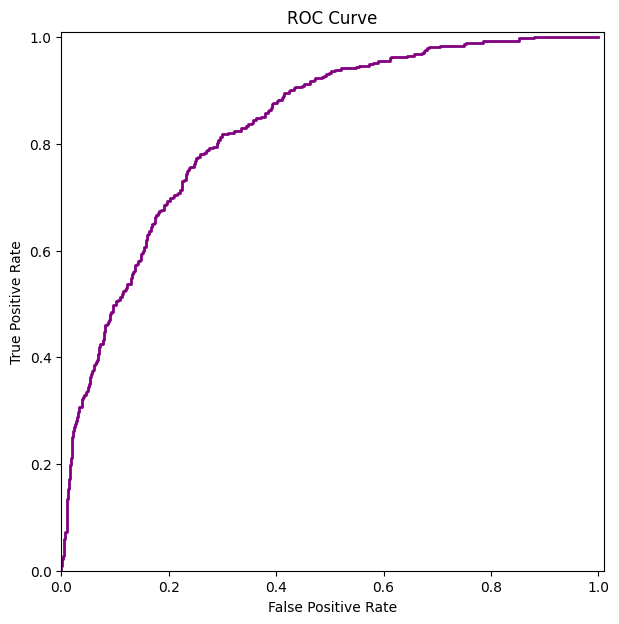

Area under Curve: 0.832


In [234]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_prob[:,1])
auc1 = round(roc_auc_score(y_test, y_prob[:,1]),3)

plt.figure(figsize=(7,7))

plt.plot(fpr1,tpr1, color='purple', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim(0.0,1.01)
plt.ylim(0,1.01)
plt.title('ROC Curve')
plt.show()

print("Area under Curve:", auc1)

# Decision Tree and KNN

In [235]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [236]:
dtmodel = DecisionTreeClassifier()
dtmodel.fit(x_train, y_train)
dty_pred = dtmodel.predict(x_test)

dtcm = confusion_matrix(y_test, dty_pred)
dtacc = accuracy_score(y_test, dty_pred)
dtpreci = precision_score(y_test, dty_pred)
dtrec = recall_score(y_test, dty_pred)
dtf1 = f1_score(y_test, dty_pred)

print("Confusion Matrix:\n", dtcm)
print("Accuracy Score:", dtacc)
print("Precision Score:", dtpreci)
print("Recall Score:", dtrec)
print("F1 Score:", dtf1)

Confusion Matrix:
 [[830 203]
 [194 180]]
Accuracy Score: 0.7178393745557925
Precision Score: 0.4699738903394256
Recall Score: 0.48128342245989303
F1 Score: 0.47556142668428003


In [237]:
k = [3,5,7]
for n in k:
  print("K = ", n)
  knnmodel = KNeighborsClassifier(n_neighbors=n)
  knnmodel.fit(x_train, y_train)
  knn_pred = knnmodel.predict(x_test)

  knncm = confusion_matrix(y_test, dty_pred)
  knnacc = accuracy_score(y_test, dty_pred)
  knnpreci = precision_score(y_test, dty_pred)
  knnrec = recall_score(y_test, dty_pred)
  knnf1 = f1_score(y_test, dty_pred)

  print("Confusion Matrix:\n", knncm)
  print("Accuracy Score:", knnacc)
  print("Precision Score:", knnpreci)
  print("Recall Score:", knnrec)
  print("F1 Score:", knnf1)
  print()

K =  3
Confusion Matrix:
 [[830 203]
 [194 180]]
Accuracy Score: 0.7178393745557925
Precision Score: 0.4699738903394256
Recall Score: 0.48128342245989303
F1 Score: 0.47556142668428003

K =  5
Confusion Matrix:
 [[830 203]
 [194 180]]
Accuracy Score: 0.7178393745557925
Precision Score: 0.4699738903394256
Recall Score: 0.48128342245989303
F1 Score: 0.47556142668428003

K =  7
Confusion Matrix:
 [[830 203]
 [194 180]]
Accuracy Score: 0.7178393745557925
Precision Score: 0.4699738903394256
Recall Score: 0.48128342245989303
F1 Score: 0.47556142668428003



# SMOTE - Synthetic Minoriy Over Sampling Technique
Used to handle imbalance in classes

In [238]:
from imblearn.over_sampling import SMOTE

In [239]:
smote = SMOTE()
x_new, y_new = smote.fit_resample(x_train, y_train)

In [240]:
logreg.fit(x_new, y_new)
ynew_prob = logreg.predict_proba(x_test)
ynew_label = logreg.predict(x_test)

newcm = confusion_matrix(y_test, ynew_label)
newacc = accuracy_score(y_test, ynew_label)
newpreci = precision_score(y_test, ynew_label)
newrec = recall_score(y_test, ynew_label)
newf1 = f1_score(y_test, ynew_label)

print("Confusion Matrix:\n", newcm)
print("Accuracy Score:", newacc)
print("Precision Score:", newpreci)
print("Recall Score:", newrec)
print("F1 Score:", newf1)

Confusion Matrix:
 [[746 287]
 [ 79 295]]
Accuracy Score: 0.7398720682302772
Precision Score: 0.506872852233677
Recall Score: 0.7887700534759359
F1 Score: 0.6171548117154811


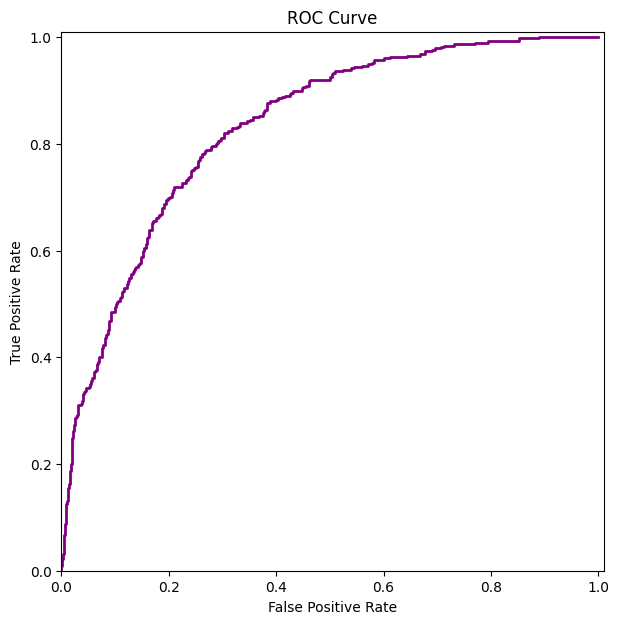

Area under Curve: 0.831


In [241]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, ynew_prob[:,1])
auc2 = round(roc_auc_score(y_test, ynew_prob[:,1]),3)

plt.figure(figsize=(7,7))

plt.plot(fpr2,tpr2, color='purple', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim(0.0,1.01)
plt.ylim(0,1.01)
plt.title('ROC Curve')
plt.show()

print("Area under Curve:", auc2)

# Model Evaluation and Comparison

In [242]:
from sklearn.metrics import precision_recall_curve, average_precision_score

In [243]:
#Logistic Regression
prec, rec, thr1 = precision_recall_curve(y_test, y_prob[:, 1])
avg_prec = average_precision_score(y_test, y_prob[:, 1])

#Decision Tree
dty_prob = dtmodel.predict_proba(x_test)
prec_dt, rec_dt, thr2 = precision_recall_curve(y_test, dty_prob[:, 1])
avg_prec_dt = average_precision_score(y_test, dty_prob[:, 1])

#KNN
knn_prob = knnmodel.predict_proba(x_test)
prec_knn, rec_knn, thr3 = precision_recall_curve(y_test, knn_prob[:, 1])
avg_prec_knn = average_precision_score(y_test, knn_prob[:, 1])

#Logistic AFTER SMOTE
prec_smolog, rec_smolog, thr4 = precision_recall_curve(y_test, ynew_prob[:, 1])
avg_prec_smolog = average_precision_score(y_test, ynew_prob[:, 1])

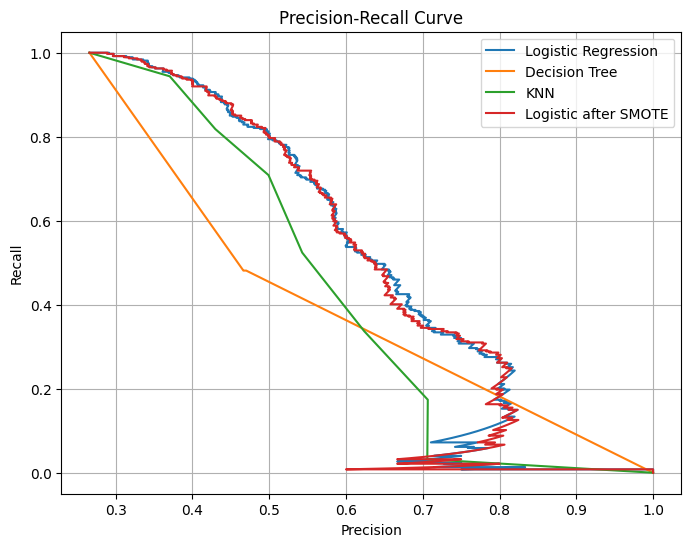

Average Precision Scores:
Logistic Regression: 0.6307470389045755
Decision Tree: 0.36407266088838264
KNN: 0.5267872295226975
Logistic Regression with SMOTE: 0.630200087207084


In [244]:
plt.figure(figsize=(8, 6))
plt.plot(prec, rec, label='Logistic Regression')
plt.plot(prec_dt, rec_dt, label='Decision Tree')
plt.plot(prec_knn, rec_knn, label='KNN')
plt.plot(prec_smolog, rec_smolog, label='Logistic after SMOTE')


plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# Display average precision scores
print("Average Precision Scores:")
print(f"Logistic Regression:", avg_prec)
print(f"Decision Tree:", avg_prec_dt)
print(f"KNN:",avg_prec_knn)
print(f"Logistic Regression with SMOTE:",avg_prec_smolog)


# Stratified Cross Validation using StratifiedKFolds


In [245]:
from sklearn.model_selection import StratifiedKFold

In [248]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

score1 = []
score2 = []
score3 = []
score4 = []

#Logistic Regression
for train, test in skf.split(X,y):
  x_train, x_test = X.iloc[train], X.iloc[test]
  y_train, y_test = y.iloc[train], y.iloc[test]

  model = LogisticRegression()
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  score = f1_score(y_test, y_pred)
  score1.append(score)

#Decision Tree
for train, test in skf.split(X,y):
  x_train, x_test = X.iloc[train], X.iloc[test]
  y_train, y_test = y.iloc[train], y.iloc[test]

  model = DecisionTreeClassifier()
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  score = f1_score(y_test, y_pred)
  score2.append(score)

#KNN
for train, test in skf.split(X,y):
  x_train, x_test = X.iloc[train], X.iloc[test]
  y_train, y_test = y.iloc[train], y.iloc[test]

  model = KNeighborsClassifier()
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  score = f1_score(y_test, y_pred)
  score3.append(score)

#Logistic AFTER SMOTE
for train, test in skf.split(X,y):
  x_train, x_test = X.iloc[train], X.iloc[test]
  y_train, y_test = y.iloc[train], y.iloc[test]

  smote = SMOTE()
  x_new, y_new = smote.fit_resample(x_train, y_train)

  model = LogisticRegression()
  model.fit(x_new, y_new)
  y_pred = model.predict(x_test)

  score = f1_score(y_test, y_pred)
  score4.append(score)

In [252]:
print("Logistic Regression:\n", score1)
print("\nDecision Tree:\n",score2)
print("\nKNN:\n",score3)
print("\nLogistic AFTER SMOTE:\n",score4)

Logistic Regression:
 [0.6086956521739131, 0.6049204052098408, 0.5838150289017341, 0.5918367346938775, 0.6108663729809104]

Decision Tree:
 [0.5145888594164456, 0.5284552845528455, 0.45371577574967403, 0.5065963060686016, 0.4861294583883752]

KNN:
 [0.5457063711911357, 0.533515731874145, 0.5261744966442953, 0.5598885793871866, 0.5454545454545454]

Logistic AFTER SMOTE:
 [0.6383881230116649, 0.6303418803418803, 0.6329896907216495, 0.6325878594249201, 0.6075949367088608]


# Conclusion

In this project, we built a machine learning pipeline to predict customer churn using telecom service data. After loading and cleaning the dataset, we performed exploratory data analysis to understand customer behaviors associated with churn.

Using logistic regression, we were able to establish a baseline model that identified important features such as:

- Contract type: Month-to-month customers showed a much higher churn rate.

- Internet service: Customers using fiber optic connections churned more often.

- Technical support and online security: Their absence was associated with higher churn.

- Monthly and total charges: Higher charges showed correlation with churn, depending on tenure.

Logistic Regression provided the best score compared to the basic models. Although Logistic is simple and interpretable, its performance may be limited for more complex relationships in the data.